# Entregable Aprendizaje Supervisado
---

*Grupo 9*
* *Bosch, María Candelaria*
* *Juarez, Manuel*
* *Mecchia, Martín*
* *Montironi, Sebastian*


---

##Análisis exporatorio de datos

---

*Investigamos previamente sobre cómo se define la diabetes y cuales son los factores predisponentes de la enfermedad, además de consultar con expertos de dominio (médicos, enfermeros).*

*Los atributos que son tenidos en cuenta por su influencia en el desarrollo de la enfermedad son:*


*   *blood_glucose_level*
*   *HbA1c_level*
*   *bmi*
*   *age*

*Realizaremos el análisis exploratorio del dataset para verificar que estas variables sean adecuadas para entrenar los modelos a posteriori*

---



---

*Primero importamos las librerías necesarias y la base de datos *

---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
custom_palette = [ '#c9cba3', '#e26d5c']
sns.set_palette(custom_palette)

In [ ]:
url= 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/diabetes_prediction_dataset_train-labeled.csv'

df = pd.read_csv(url)

In [ ]:
df

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,20432,Male,4.0,0,0,never,19.28,3.5,155,0
1,49682,Female,50.0,0,0,former,27.32,5.7,159,0
2,73886,Female,43.0,0,0,never,21.54,4.5,145,0
3,53144,Male,64.0,0,0,current,28.22,6.0,130,0
4,98507,Male,10.0,0,0,No Info,15.46,6.1,140,0
...,...,...,...,...,...,...,...,...,...,...
94995,81090,Female,56.0,0,0,never,22.30,6.2,158,0
94996,90924,Female,24.0,0,0,never,22.50,6.1,126,0
94997,64600,Female,32.0,0,0,never,24.92,6.6,145,0
94998,96132,Female,21.0,0,0,current,20.59,4.5,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient              95000 non-null  int64  
 1   gender               95000 non-null  object 
 2   age                  95000 non-null  float64
 3   hypertension         95000 non-null  int64  
 4   heart_disease        95000 non-null  int64  
 5   smoking_history      95000 non-null  object 
 6   bmi                  95000 non-null  float64
 7   HbA1c_level          95000 non-null  float64
 8   blood_glucose_level  95000 non-null  int64  
 9   diabetes             95000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.2+ MB


In [ ]:
print(df.dtypes)

patient                  int64
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
print('Unique genders:', df.gender.unique())

Unique genders: ['Male' 'Female' 'Other']


In [ ]:
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
print(gender_counts)

   gender  count
0  Female  55563
1    Male  39421
2   Other     16


---
*Desde un punto de vista médico y biológico no nos otorga tanta información Other y además tiene muy pocos valores entonces se descarta*

---

In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
print('Unique genders:', df.gender.unique())


Unique genders: ['Male' 'Female']


In [ ]:
df.describe()

,patient,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,94984.000000,94984.000000,94984.000000,94984.000000,94984.000000,94984.000000,94984.000000,94984.000000
mean,50017.014202,41.937469,0.075086,0.039470,27.320935,5.527667,138.070949,0.085088
std,28869.217720,22.515021,0.263532,0.194711,6.626415,1.070264,40.741437,0.279014
min,1.000000,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,25021.750000,24.000000,0.000000,0.000000,23.650000,4.800000,100.000000,0.000000
50%,50024.000000,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,75026.250000,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,100000.000000,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


---

* *En las columnas hypertension, heart_disease, diabetes los valores son binarios, 0 o 1, es decir si tienen o no*
* *La columna patient tiene un num de indicador de paciente*
* *bmi, blood_glucose_level y HbA1c_level tienen el valor de la medición de esos parámetros*

---

In [ ]:
count_diabetes = df['diabetes'].value_counts()
print(count_diabetes)

0    86902
1     8082
Name: diabetes, dtype: int64


In [ ]:
total_rows = len(df)
count_diabetes = df['diabetes'].value_counts()

percentage_diabetes_0 = (count_diabetes[0] / total_rows) * 100
percentage_diabetes_1 = (count_diabetes[1] / total_rows) * 100

print("Porcentaje sin diabetes:", round(percentage_diabetes_0))
print("Porcentaje con diabetes:", round(percentage_diabetes_1))

Porcentaje sin diabetes: 91
Porcentaje con diabetes: 9


In [ ]:
#voy a crear una copia para no alterar el original
df_formatos = df.copy()

In [ ]:
#aca convierto la columna diabetes en string
df_formatos['diabetes'] = df_formatos['diabetes'].apply(str)
print(df_formatos.dtypes)

patient                  int64
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                object
dtype: object


In [ ]:
#reemplazo los 1 en Diabetico y 0 en No Diabetico
df_formatos.loc[:,'diabetes'] = df_formatos.diabetes.replace({'1': 'Diabetico','0': 'No Diabetico'})

In [ ]:
df_formatos

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,20432,Male,4.0,0,0,never,19.28,3.5,155,No Diabetico
1,49682,Female,50.0,0,0,former,27.32,5.7,159,No Diabetico
2,73886,Female,43.0,0,0,never,21.54,4.5,145,No Diabetico
3,53144,Male,64.0,0,0,current,28.22,6.0,130,No Diabetico
4,98507,Male,10.0,0,0,No Info,15.46,6.1,140,No Diabetico
...,...,...,...,...,...,...,...,...,...,...
94995,81090,Female,56.0,0,0,never,22.30,6.2,158,No Diabetico
94996,90924,Female,24.0,0,0,never,22.50,6.1,126,No Diabetico
94997,64600,Female,32.0,0,0,never,24.92,6.6,145,No Diabetico
94998,96132,Female,21.0,0,0,current,20.59,4.5,155,No Diabetico


Text(0.5, 1.0, 'HbA1c_level vs blood_glucose_level')

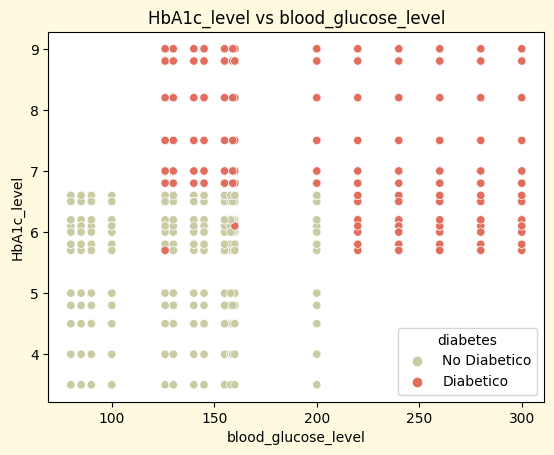

In [ ]:
plt.figure(facecolor='#fefae0')

sns.scatterplot(data=df_formatos, x="blood_glucose_level", y="HbA1c_level",hue="diabetes").set_title("HbA1c_level vs blood_glucose_level")

#glucosa mayor a 200 y  hemoglobina mayor a 6,5 indicaria diabetes

---

*Observamos que valores superiores a 200 de blood_glucose_level y valores superiores de 6,5 de HbA1c_level indicarian diabetes. Tambien hay otros casos que pueden deberse a otras condiciones.*

---


In [ ]:
#Creo la funcion para asignar la categoría según el valor
def f(row):
    if row['bmi'] < 18.5:
        val = 'underweight'
    elif (row['bmi'] >= 18.5 and row['bmi']< 24.9):
        val = 'normal'
    elif (row['bmi'] >= 25 and row['bmi']< 29.9):
        val = 'overweight'
    else:
        val = 'obese'
    return val

In [ ]:
#aplico la función
df_formatos['bmi_text'] = df_formatos.apply(f, axis=1)

In [ ]:
#chequeo que la categoría este aplicada
df_formatos

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_text
0,20432,Male,4.0,0,0,never,19.28,3.5,155,No Diabetico,normal
1,49682,Female,50.0,0,0,former,27.32,5.7,159,No Diabetico,overweight
2,73886,Female,43.0,0,0,never,21.54,4.5,145,No Diabetico,normal
3,53144,Male,64.0,0,0,current,28.22,6.0,130,No Diabetico,overweight
4,98507,Male,10.0,0,0,No Info,15.46,6.1,140,No Diabetico,underweight
...,...,...,...,...,...,...,...,...,...,...,...
94995,81090,Female,56.0,0,0,never,22.30,6.2,158,No Diabetico,normal
94996,90924,Female,24.0,0,0,never,22.50,6.1,126,No Diabetico,normal
94997,64600,Female,32.0,0,0,never,24.92,6.6,145,No Diabetico,obese
94998,96132,Female,21.0,0,0,current,20.59,4.5,155,No Diabetico,normal


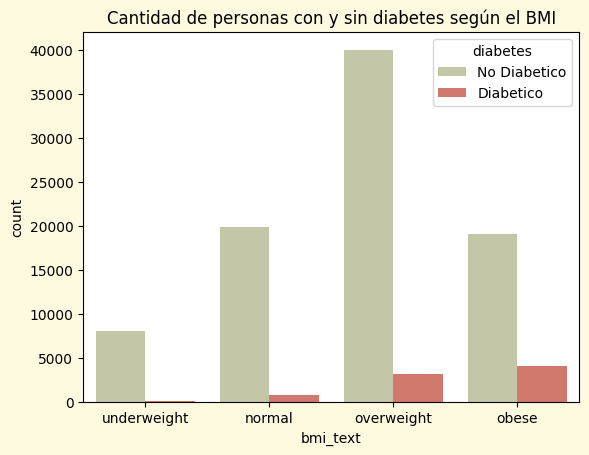

In [ ]:
categories_order = ["underweight", "normal", "overweight", "obese"]

plt.figure(facecolor='#fefae0')
sns.countplot(data=df_formatos, x="bmi_text", hue="diabetes", order=categories_order)
plt.title("Cantidad de personas con y sin diabetes según el BMI")
plt.show()

---

*En este gráfico vemos como la cantidad de personas diabéticas aumenta con el aumento del BMI*

---

Text(0.5, 1.0, 'Cantidad de personas son y sin diabetes por sexo')

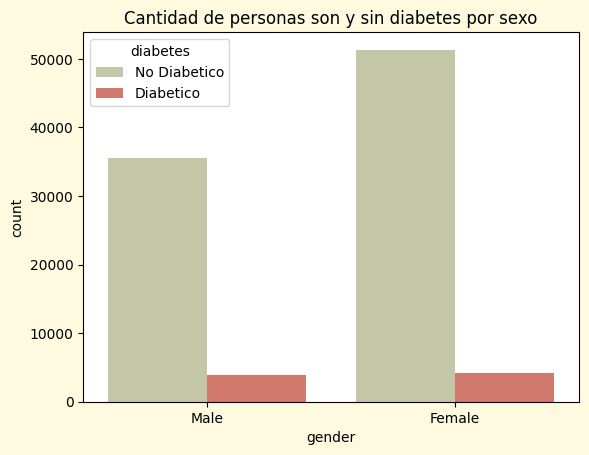

In [ ]:
plt.figure(facecolor='#fefae0')
sns.countplot(data=df_formatos, x='gender', hue='diabetes').set_title("Cantidad de personas son y sin diabetes por sexo")

---

*Como podemos ver el género no tiene una relación fuerte con la presencia de la enfermedad*

---

Text(0.5, 1.0, 'Cantidad de personas con y sin diabetes por rango de edad')

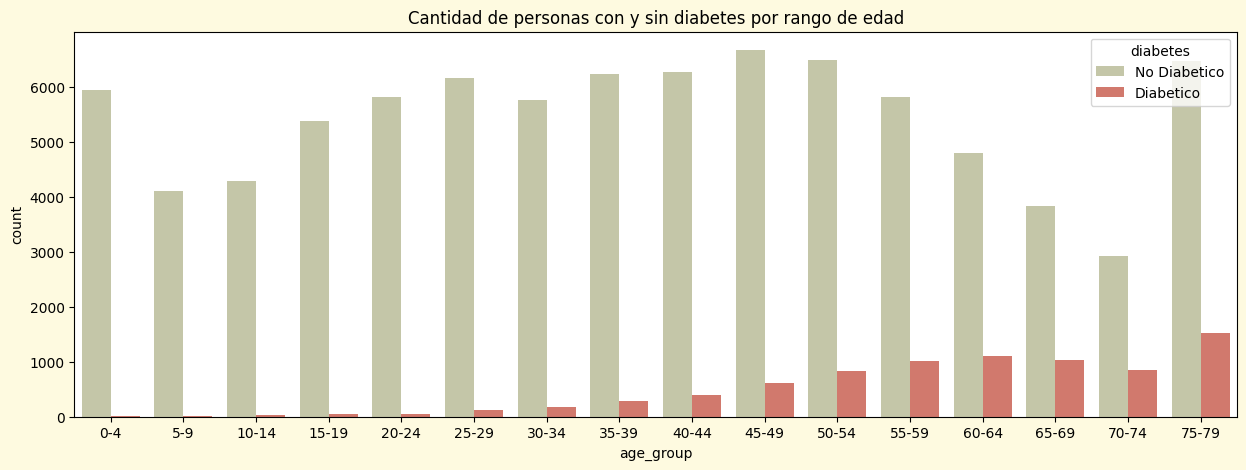

In [ ]:
data = df_formatos

bins = range(0, 85, 5)

data['age_group'] = pd.cut(data['age'], bins=bins, labels=[f'{i}-{i+4}' for i in bins[:-1]])

age_counts = data['age_group'].value_counts().sort_index()

plt.figure(figsize=(15, 5), facecolor='#fefae0')

sns.countplot(data=df_formatos, x='age_group', hue='diabetes').set_title("Cantidad de personas con y sin diabetes por rango de edad")

---

*Observamos que hay un aumento de pacientes diabeticos con la edad.*

---


---

*Las variables que son tenidas en cuenta para el análisis son:*
**blood_glucose_level, HbA1c_level, BMI y Age.**
*Las demás* **(Gender, hypertension, heart_disease y smoking_history)** *no son factores que predisponen para el desarrollo de  la diabetes.*

---

In [ ]:
columns_to_drop = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

df = df.drop(columns=columns_to_drop)

df

,patient,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,20432,4.0,19.28,3.5,155,0
1,49682,50.0,27.32,5.7,159,0
2,73886,43.0,21.54,4.5,145,0
3,53144,64.0,28.22,6.0,130,0
4,98507,10.0,15.46,6.1,140,0
...,...,...,...,...,...,...
94995,81090,56.0,22.30,6.2,158,0
94996,90924,24.0,22.50,6.1,126,0
94997,64600,32.0,24.92,6.6,145,0
94998,96132,21.0,20.59,4.5,155,0


## MODELOS

---

### Modelo Regresión Logística

---


In [ ]:
X = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)

# Classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)


Accuracy: 0.9599936832131389
Confusion Matrix:
[[17227   154]
 [  606  1010]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17381
           1       0.87      0.62      0.73      1616

    accuracy                           0.96     18997
   macro avg       0.92      0.81      0.85     18997
weighted avg       0.96      0.96      0.96     18997



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# vuelvo a armar el modelo
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# voy a predecir las probabilidades para la clase 1
y_pred_probs = model.predict_proba(X_test)[:, 1]

# lista vacía para guardarle los resultados de la evaluación para cada umbral
results = []

# umbrales entre 0.1 y 0.9 no hay poque
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# evaluar el modelo para cada umbral
for threshold in thresholds:
    # convertit probabilidades en predicciones binarias basadas en el umbral
    y_pred = (y_pred_probs > threshold).astype(int)

    # calcular accuracy y F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append resultados a la lista
    results.append((threshold, accuracy, f1))

# Print la evaluacion para los dist umbrales
for threshold, accuracy, f1 in results:
    print(f"Threshold: {threshold:.2f} - Accuracy: {accuracy:.4f} - F1-score: {f1:.4f}")


Threshold: 0.10 - Accuracy: 0.6544 - F1-score: 0.3270
Threshold: 0.20 - Accuracy: 0.7488 - F1-score: 0.3952
Threshold: 0.30 - Accuracy: 0.8048 - F1-score: 0.4513
Threshold: 0.40 - Accuracy: 0.8458 - F1-score: 0.5013
Threshold: 0.50 - Accuracy: 0.8781 - F1-score: 0.5508
Threshold: 0.60 - Accuracy: 0.9055 - F1-score: 0.5996
Threshold: 0.70 - Accuracy: 0.9274 - F1-score: 0.6460
Threshold: 0.80 - Accuracy: 0.9455 - F1-score: 0.6926
Threshold: 0.90 - Accuracy: 0.9579 - F1-score: 0.7211


---

*El mejor umbral para optimizar la red sería el de 0.9*

---

---

### Modelo Multinomial Naive Bayes

---


In [ ]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)

# Classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.9060904353318945
Confusion Matrix:
[[16866   515]
 [ 1269   347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     17381
           1       0.40      0.21      0.28      1616

    accuracy                           0.91     18997
   macro avg       0.67      0.59      0.61     18997
weighted avg       0.89      0.91      0.89     18997



---

## Bernoulli Naive Bayes y Categorical Naive Bayes


---

---

Corrección de Gisela: el modelo MultinomialNB se utiliza cuando el problema se trata de predecir etiquetas multiclase. En este caso hay 2 clases, diabetes SI y diabetes NO, por lo que el modelo más adecuado sería Bernoulli NB.

*Probamos con Bernoulli Naive Bayes y con Categorical Naive Bayes y obtuvimos mejores resultados*

----

In [ ]:
from sklearn.naive_bayes import BernoulliNB #experimento bernoulli se define el éxito

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

model = BernoulliNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)

# Classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.9149339369374112
Confusion Matrix:
[[17381     0]
 [ 1616     0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96     17381
         1.0       0.00      0.00      0.00      1616

    accuracy                           0.91     18997
   macro avg       0.46      0.50      0.48     18997
weighted avg       0.84      0.91      0.87     18997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import CategoricalNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

model = CategoricalNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)

# Classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.9687845449281466
Confusion Matrix:
[[17371    10]
 [  583  1033]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     17381
         1.0       0.99      0.64      0.78      1616

    accuracy                           0.97     18997
   macro avg       0.98      0.82      0.88     18997
weighted avg       0.97      0.97      0.97     18997



---

## Modelo Random Forest

---

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [ ]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 98.49%
Accuracy test {name}: 83.98%


In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
  'min_samples_leaf':(1, 2, 5),
  'min_samples_split':(2, 3, 5, 10, 50, 100),
 'max_depth':(5,10,20)})
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Accuracy train Arbol de decisión: 97.17%
Accuracy test Arbol de decisión: 97.25%


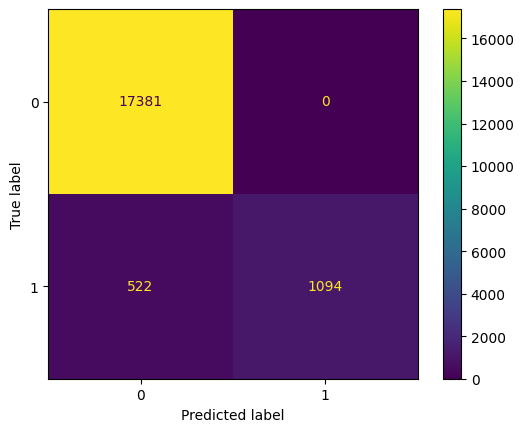

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17381
           1       1.00      0.68      0.81      1616

    accuracy                           0.97     18997
   macro avg       0.99      0.84      0.90     18997
weighted avg       0.97      0.97      0.97     18997



In [ ]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)

train_predictions = clf.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(X_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(X_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(max_depth=5)
Precisión test fold 0: 97.18
Precisión test fold 1: 97.15
Precisión test fold 2: 97.24
Precisión test fold 3: 97.07
Precisión test fold 4: 97.20
Avg. accuracy = 97.1653046232667
